In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac258168055ed1bdeb1780d03e8ed465


In [5]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "austin"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [18]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [19]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [20]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [21]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
# If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [22]:
cities

['yaransk',
 'williston',
 'tilichiki',
 'ponta do sol',
 'guymon',
 'qaanaaq',
 'puerto ayora',
 'rikitea',
 'sola',
 'fortuna',
 'marsabit',
 'busselton',
 'lagoa',
 'klaksvik',
 'constitucion',
 'albany',
 'mgandu',
 'saleaula',
 'kapaa',
 'kirkwall',
 'mbanza-ngungu',
 'tuktoyaktuk',
 'illoqqortoormiut',
 'jiaojiang',
 'cockburn town',
 'nuevitas',
 'tiksi',
 'east london',
 'cabo san lucas',
 'bredasdorp',
 'samusu',
 'cabedelo',
 'lebu',
 'marcona',
 'taolanaro',
 'hermanus',
 'iqaluit',
 'geraldton',
 'kodiak',
 'clyde river',
 'ushuaia',
 'yuncheng',
 'consolacion del sur',
 'nizhneyansk',
 'khandyga',
 'tatawin',
 'kulhudhuffushi',
 'itoman',
 'butaritari',
 'hilo',
 'gayny',
 'kuche',
 'cidreira',
 'grand river south east',
 'sinnamary',
 'vila franca do campo',
 'dingzhou',
 'provideniya',
 'mehamn',
 'manzhouli',
 'the valley',
 'lodwar',
 'wahran',
 'vaini',
 'punta arenas',
 'korla',
 'porto novo',
 'sao filipe',
 'vao',
 'faya',
 'fare',
 'yellowknife',
 'thompson',
 'ba

In [23]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters 
record_count = 1
set_count = 1


# Loop through all the cities in our list.
for i,city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city.   
    city_url = url + "&q=" + city.replace(" ","+")
    
     # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yaransk
Processing Record 2 of Set 1 | williston
Processing Record 3 of Set 1 | tilichiki
Processing Record 4 of Set 1 | ponta do sol
Processing Record 5 of Set 1 | guymon
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | sola
Processing Record 10 of Set 1 | fortuna
Processing Record 11 of Set 1 | marsabit
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | lagoa
Processing Record 14 of Set 1 | klaksvik
Processing Record 15 of Set 1 | constitucion
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | mgandu
Processing Record 18 of Set 1 | saleaula
City not found. Skipping...
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | kirkwall
Processing Record 21 of Set 1 | mbanza-ngungu
Processing Record 22 of Set 1 | tuktoyaktuk
Processing Recor

Processing Record 35 of Set 4 | cherskiy
Processing Record 36 of Set 4 | norman wells
Processing Record 37 of Set 4 | oussouye
Processing Record 38 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 39 of Set 4 | luwuk
Processing Record 40 of Set 4 | usakos
Processing Record 41 of Set 4 | nome
Processing Record 42 of Set 4 | santa maria
Processing Record 43 of Set 4 | lismore
Processing Record 44 of Set 4 | belmonte
Processing Record 45 of Set 4 | coquimbo
Processing Record 46 of Set 4 | guerrero negro
Processing Record 47 of Set 4 | meyungs
City not found. Skipping...
Processing Record 48 of Set 4 | kavieng
Processing Record 49 of Set 4 | saldanha
Processing Record 50 of Set 4 | sharjah
Processing Record 1 of Set 5 | mattru
Processing Record 2 of Set 5 | rio gallegos
Processing Record 3 of Set 5 | flinders
Processing Record 4 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 5 | naze
Processing Record 6 of Set 5 | mocuba
Processing Recor

Processing Record 24 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 25 of Set 8 | japura
Processing Record 26 of Set 8 | kramat
Processing Record 27 of Set 8 | shingu
Processing Record 28 of Set 8 | hay river
Processing Record 29 of Set 8 | bima
Processing Record 30 of Set 8 | leningradskiy
Processing Record 31 of Set 8 | mala vyska
Processing Record 32 of Set 8 | hit
Processing Record 33 of Set 8 | noumea
Processing Record 34 of Set 8 | tuatapere
Processing Record 35 of Set 8 | hamilton
Processing Record 36 of Set 8 | zhezkazgan
Processing Record 37 of Set 8 | panaba
Processing Record 38 of Set 8 | seoul
Processing Record 39 of Set 8 | griffith
Processing Record 40 of Set 8 | aquiraz
Processing Record 41 of Set 8 | abay
Processing Record 42 of Set 8 | bereznik
Processing Record 43 of Set 8 | tremedal
Processing Record 44 of Set 8 | bridlington
Processing Record 45 of Set 8 | itacare
Processing Record 46 of Set 8 | sibolga
Processing Record 47 of Set 8 | tibiri
Proces

Processing Record 14 of Set 12 | paamiut
Processing Record 15 of Set 12 | hun
Processing Record 16 of Set 12 | senneterre
Processing Record 17 of Set 12 | avera
Processing Record 18 of Set 12 | zalantun
Processing Record 19 of Set 12 | araouane
Processing Record 20 of Set 12 | sydney
Processing Record 21 of Set 12 | balikpapan
Processing Record 22 of Set 12 | galgani
City not found. Skipping...
Processing Record 23 of Set 12 | mamallapuram
Processing Record 24 of Set 12 | haverfordwest
Processing Record 25 of Set 12 | vanimo
Processing Record 26 of Set 12 | bilma
Processing Record 27 of Set 12 | manadhoo
Processing Record 28 of Set 12 | tomatlan
Processing Record 29 of Set 12 | raudeberg
Processing Record 30 of Set 12 | north bend
Processing Record 31 of Set 12 | port-cartier
Processing Record 32 of Set 12 | todos santos
Processing Record 33 of Set 12 | amahai
Processing Record 34 of Set 12 | khonuu
City not found. Skipping...
Processing Record 35 of Set 12 | seoni
Processing Record 36

In [24]:
len(city_data)

562

In [43]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yaransk,57.3033,47.8861,33.55,98,100,20.62,RU,2022-03-26 15:42:50
1,Williston,48.1470,-103.6180,24.82,62,99,1.99,US,2022-03-26 15:41:01
2,Tilichiki,60.4667,166.1000,5.02,95,99,3.13,RU,2022-03-26 15:42:51
3,Ponta Do Sol,32.6667,-17.1000,69.06,81,100,13.73,PT,2022-03-26 15:42:51
4,Guymon,36.6828,-101.4816,53.60,54,0,12.66,US,2022-03-26 15:40:13
5,Qaanaaq,77.4840,-69.3632,0.90,83,98,3.83,GL,2022-03-26 15:42:52
6,Puerto Ayora,-0.7393,-90.3518,82.36,76,100,9.28,EC,2022-03-26 15:42:52
7,Rikitea,-23.1203,-134.9692,78.76,75,4,13.38,PF,2022-03-26 15:42:52
8,Sola,-13.8833,167.5500,74.07,100,40,0.00,VU,2022-03-26 15:42:53
9,Fortuna,40.5982,-124.1573,45.52,100,0,8.05,US,2022-03-26 15:42:53


In [44]:
city_data_df = city_data_df[["City", "Country", "Date" ,"Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yaransk,RU,2022-03-26 15:42:50,57.3033,47.8861,33.55,98,100,20.62
1,Williston,US,2022-03-26 15:41:01,48.1470,-103.6180,24.82,62,99,1.99
2,Tilichiki,RU,2022-03-26 15:42:51,60.4667,166.1000,5.02,95,99,3.13
3,Ponta Do Sol,PT,2022-03-26 15:42:51,32.6667,-17.1000,69.06,81,100,13.73
4,Guymon,US,2022-03-26 15:40:13,36.6828,-101.4816,53.60,54,0,12.66
...,...,...,...,...,...,...,...,...,...
557,San Andres,CO,2022-03-26 15:58:18,12.5847,-81.7006,84.22,65,40,11.50
558,Tanda,IN,2022-03-26 15:58:18,26.5500,82.6500,79.93,11,0,7.63
559,Nha Trang,VN,2022-03-26 15:57:07,12.2500,109.1833,80.60,86,0,3.29
560,Krupka,CZ,2022-03-26 15:58:19,50.6845,13.8582,61.14,54,15,14.00


In [50]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [51]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

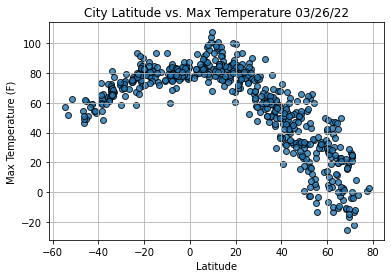

In [52]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

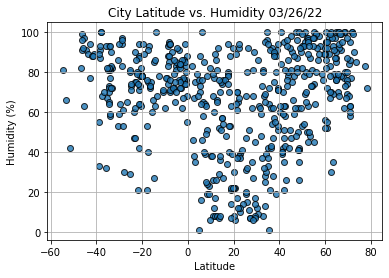

In [53]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

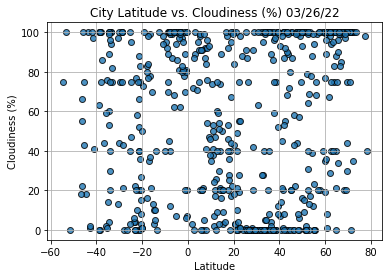

In [54]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

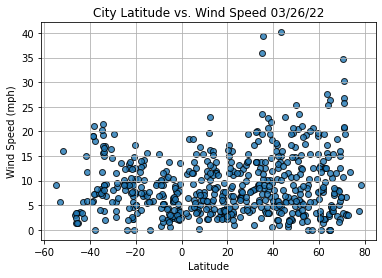

In [55]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
